In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Aim**:To build a regression model to predict the amount of currency in the economy

**Data Description**- 

The data observesthe various monetary variables in India over a period of 58 months. The variables in the data set are:<br>
1) M1(the amount of currency in circulation) <br>
2) IIP (the index of inflation),  <br>
3) INT (the bank interest rates),<br>
4) UPI (the value of UPI transactions in that month)<br>
5) CC (the value of credit card transactions in that month),<br>
6)DC (the value of debit card transactions in that month) 

__The dependant variable is M1, the amount of curreny circulation in the economy__.

In [191]:
df=pd.read_excel('Book2.xlsx')

In [192]:
df.head()

,M1,IIP,INT,UPI,CC,DC
0,9.927523,4.965638,7.5,-4.710531,18.157995,20.561188
1,9.924515,4.864453,7.5,-4.710531,18.198125,20.596799
2,9.934464,4.914124,7.5,-4.710531,18.253460,20.603657
3,9.980841,4.922896,7.3,-4.605170,18.179002,20.580925
4,9.952027,4.841822,7.3,-3.540459,18.309591,20.664207


In [193]:
df.shape

#58 rows and 6 columns

(58, 6)

**Data Summary**

In [194]:
df.describe()

,M1,IIP,INT,UPI,CC,DC
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,10.057547,4.818563,6.757759,2.733861,18.721533,20.734361
std,0.150557,0.132757,0.662054,2.936856,0.263930,0.175073
min,9.650819,3.988984,5.500000,-4.710531,18.157995,20.035676
25%,9.943455,4.786239,6.450000,1.358243,18.550146,20.649635
50%,10.069179,4.837472,6.900000,4.044054,18.750236,20.735230
75%,10.158493,4.878999,7.287500,4.823296,18.929885,20.870029
max,10.326937,4.970508,7.500000,5.610087,19.142710,20.996368


We observe that the minimum amount of currency circulation in the economy is 9.
65 and the maximum is 10.327. The index of inflation ranges between 3.989 to 4.971. The bank interest rate is between 5.5 and 7.5 The range of value of UPI transactions are between -4.711 to 5.610.The value of credit card transactions lies between 18.16 to 19.14. The value of debit transactions lie between 20 to 21

In [195]:
for i in df:
    print(df[i].dtype)
    
#All the columns are float type

float64
float64
float64
float64
float64
float64


In [196]:
df.isnull().sum()

#No null values

M1     0
IIP    0
INT    0
UPI    0
CC     0
DC     0
dtype: int64

**Correlation Plot**

In [197]:
import seaborn as sns

In [198]:
cor1=df.corr()

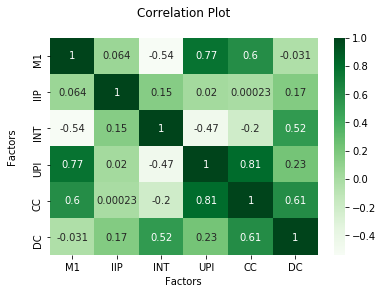

In [199]:
sns.heatmap(cor1,cmap='Greens',annot=True)
plt.title('Correlation Plot\n')
plt.xlabel('Factors\n')
plt.ylabel('Factors\n')
plt.show()

From this table, we observe that there is high correlation between UPI value and value of credit card transactions. There is also high correlation between UPI and the money circulated. There is medium correlation between the credit and debit card valuations.We can observe low correlation with respect to credit card and bank interest rates.There is no correlation between credit card and index of inflation.


**Building the regression model**

In [200]:
import statsmodels.api as sm

In [201]:
x=df[['IIP','INT','UPI','CC','DC']]

In [202]:
y=df['M1']

In [203]:
x=sm.add_constant(x)

In [204]:
model=sm.OLS(y,x).fit()  #fitting an ordinary least square model

In [205]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     M1   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     22.65
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           5.50e-12
Time:                        14:01:12   Log-Likelihood:                 61.551
No. Observations:                  58   AIC:                            -111.1
Df Residuals:                      52   BIC:                            -98.74
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1347      1.945      6.240      0.000       8.233      16.037
IIP            0.1514      0.092      1.646      0.106      -0.033       0.336
INT            0.0013      0.032      0.041      0.968      -0.064       0.066
UPI            0.0229      0.009      2.679      0.010       0.006       0.040
CC             0.3035      0.130      2.331      0.024       0.042       0.565
DC            -0.4129      0.160     -2.577      0.013      -0.734      -0.091
==============================================================================
Omnibus:                       16.893   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.702
Skew:                          -1.024   Prob(JB):                     4.33e-06
Kurtosis:                       5.456   Cond. No.                     4.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- We observe that intercept is significant as its p-value is lesser than the significance value (0.05). This means that if all the values were 0, then the average circulation of money would be 12.13 thousand crores. 
<br><br>
- We also observe the variables UPI, CC and DC to be significant as their p-values are lesser than the significance value (0.05).Variables such as IIP and INT have no significant relationship with the money circulated. 
<br><br>
- The overall model is significant as the p-value is way below the significance level (0.05). The R-squared value shows 0.6853 which means that the independent variables only contribute to 68.53% of variation of the dependent variable M1, the money circulated in the economy. The adjusted R-Square which is obviously lesser shows the amount of variation that is described by variables that are actually significant.

Text(0, 0.5, 'Values')

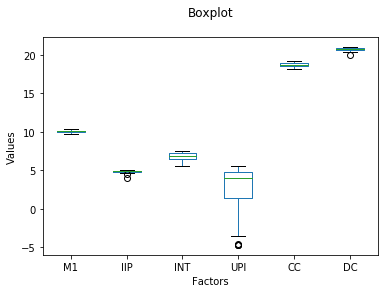

In [258]:
df.plot.box()
plt.title('Boxplot\n')
plt.xlabel('Factors')
plt.ylabel('Values')

We observe that UPI has outliers.Also transactions can not be negative and hence we must convert all negative values to postive

In [259]:
df['UPI']=abs(df['UPI'])

**Building a model with significant variables**

In [260]:
x=df[['UPI','CC','DC']]

In [261]:
y=df['M1']

In [262]:
x=sm.add_constant(x)

In [263]:
model=sm.OLS(y,x).fit()  #fitting an ordinary least square model

In [210]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     M1   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     36.36
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           5.37e-13
Time:                        14:01:24   Log-Likelihood:                 60.077
No. Observations:                  58   AIC:                            -112.2
Df Residuals:                      54   BIC:                            -103.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6149      1.525      8.273      0.000       9.558      15.672
UPI            0.0256      0.008      3.043      0.004       0.009       0.042
CC             0.2569      0.115      2.239      0.029       0.027       0.487
DC            -0.3587      0.104     -3.461      0.001      -0.567      -0.151
==============================================================================
Omnibus:                       11.094   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.587
Skew:                          -0.736   Prob(JB):                      0.00112
Kurtosis:                       4.858   Cond. No.                     3.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [264]:
predicted=pd.DataFrame(model.predict())

In [265]:
op1=pd.concat([predicted,M1],axis=1)
op1


,0,M1
0,9.979137,9.927523
1,9.980911,9.924515
2,9.997143,9.934464
3,9.974458,9.980841
4,9.937816,9.952027
5,9.927697,9.682210
6,9.855648,9.650819
7,9.848754,9.722094
8,9.804487,9.791986
9,9.827743,9.927624


**Checking OLS Assumptions**


#### 1) Multicollinearity assumption test (using VIF)

In [266]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [267]:
{i:variance_inflation_factor(x.values, i) for i in range(x.shape[1])}

{0: 14303.913198171447,
 1: 1.5071816260068487,
 2: 2.3871411176061503,
 3: 1.8965424886959767}

In [268]:
x.columns[1:4]

Index(['UPI', 'CC', 'DC'], dtype='object')

Since we see that the vif value of the regressors are not above 10, we say that assumption of no multicollinearity is satisfied.This means that no two variables interact with each other to have an impact on the money circulation in the economy.

#### 2) Heteroscedascity Test

In [269]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [270]:
het=het_breuschpagan(model.resid,model.model.exog)

In [271]:
names=['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

In [272]:
for i,j in zip(names,het):
    print(i,':',j)

Lagrange multiplier statistic : 7.783162693354391
p-value : 0.05071223040231511
f-value : 2.7898397428911528
f p-value : 0.04917961393272123


We observe that the p-values is lesser than 0.05 and say that it is heteroscedastic

**Remedying heteroscedastic**

Converting the dependant variable(M1) into log M1

In [273]:
log_y=np.log(df['M1'])

In [274]:
log_x=np.log(x)

In [275]:
log_x=log_x.dropna()

In [276]:
log_y=log_y.iloc[11:]

In [277]:
model1=sm.OLS(log_y,log_x).fit()

ValueError: The indices for endog and exog are not aligned

In [278]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     M1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.411e+05
Date:                Thu, 14 Jul 2022   Prob (F-statistic):                   1.11e-104
Time:                        15:57:11   Log-Likelihood:                          151.39
No. Observations:                  47   AIC:                                     -296.8
Df Residuals:                      44   BIC:                                     -291.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
UPI            0.0024      0.002      1.320      0.194      -0.001       0.006
CC             1.0687      0.186      5.735      0.000       0.693       1.444
DC            -0.2722      0.180     -1.513      0.138      -0.635       0.090
==============================================================================
Omnibus:                       18.631   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.687
Skew:                           1.240   Prob(JB):                     9.72e-07
Kurtosis:                       5.826   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Testing Homoscedascity**

In [279]:
het_breuschpagan(model1.resid,model1.model.exog)

(9.715570705619449,
 0.02114525276213442,
 3.821837687005406,
 0.01616874392289696)

In [280]:
predict=pd.DataFrame(model1.predict())
predict=predict.rename(columns={0:'Predicted'})

In [281]:
log_y=pd.DataFrame(log_y)

In [284]:
op=pd.concat([log_y,predict],axis=1).dropna()

op.head()

,M1,Predicted
11,2.292656,2.306387
12,2.294578,2.309017
13,2.294433,2.308003
14,2.293447,2.311325
15,2.298991,2.311047


Since there are many null values because of taking log, we ignore heteroscedascity

**Model Accuracy**`

In [227]:
from sklearn.metrics import mean_absolute_error

In [228]:
mean_absolute_error(M1,predicted)

0.06147031343637008

_The model is pretty accurate as the mean absolute error is very close to 0_

**Residual Analysis**

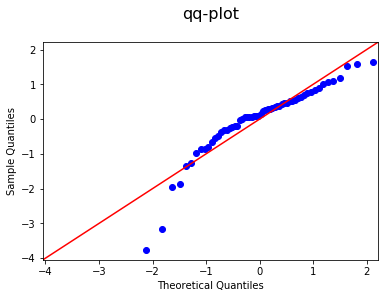

In [285]:
sm.qqplot(model.resid, line = "45", fit = True)
plt.title('qq-plot\n',fontsize=16)
plt.show()

In [286]:
from scipy.stats import shapiro

In [287]:
norm=shapiro(model.resid)
print('p-valus is',norm[1],'which is lesser than 0.05 (significance value) \nand hence we reject the H0 and say that it is not normally distributed')

p-valus is 8.201179298339412e-05 which is lesser than 0.05 (significance value) 
and hence we reject the H0 and say that it is not normally distributed


In [242]:
len(model.resid)

58

In [248]:
ns=np.arange(1,59,1)

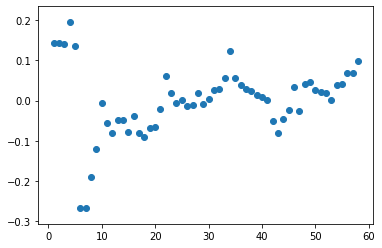

In [255]:
plt.scatter(ns,model.resid)
plt.show()

We observe that residual line deviates a lot from the dotted line showing that 
there is a huge deviation from the observed values.We see that as the fitted values become larger, the error becomes smaller.
From the Normal Q-Q plot, we observe that the data is not exaclty normal and is skewed towards the left. 


In [288]:
sm.stats.acorr_ljungbox(model.resid, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,34.066042,0.000002


We observe that the p-value is smaller than significance value (0.05) and reject the null hypothesis and say that the residuals are autocorrelated or are dependant of each other.

Although it violates two of the 3 assumption of OLS, are estiamtes are very close to the observed value and gives high accuracy.

**Conclusion**

- We observe that we got a model that only explain 65% of the variaion. Although this isn’t an ideal R-squared value,the model predicts with high accuracy regression. A higher R-square need not mean that our model isn’t fit but usually itis better to have more independent variables that truly explain the model. 

- The drawbacks of the model are that it is heteroscedastic at a few places and the errors are autocorrelated.Nevertheless, we see that the model's expected values are closed to the observed values.

- Since, the values are smaller and are in decimals, the precision really   mattersin such cases. The model can be improved by adding more variables